# PHY 102 Lab - Wave Interference

## Cell 1

Run the code below to make the animated figure.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.widgets import Slider
from scipy.integrate import odeint
# use widget on the online binder; notebook
# may work better on a local machine:
#%matplotlib notebook
%matplotlib widget


# Parameters (modify these!)
d = 0.4             # speaker distance from 0 (0.4)
v = 0.02            # speed of sound (0.02)
w = 0.2             # wavelength (0.2)

# =======================================
# Don't adjust anything below this line!
# =======================================

# calculated values
f = v/w             # frequency
k = 2*np.pi/w       # wave number
omega = 2*np.pi*f   # angular frequency

left_x = -d
right_x = d

t = 0
dt = 1/(20*f)       # should give reasonably smooth animations

# set X,Y coords
x_pos = np.linspace(-1,1,100) 
y_pos = np.linspace(0,2,100)

# Function for generating data
def create_frame(i,j):
    # find x and y coordinates for this i,j index pair
    x = (i-50)/50   # map 0->99 to -1->1
    y = j/50        # map 0->99 to 0->2 
    
    # how far is each (x,y) spot from each speaker?
    left_r = ((left_x-x)**2 + y**2)**0.5
    right_r = ((right_x-x)**2 + y**2)**0.5
    
    # Leave as 0 for locations they wave hasn't reached yet
    # Otherwise update based on the signal
    #left = np.zeros((100,100))
    #print(type(v),type(t),type(left_r),type(k),type(omega),type(t))
    left = np.where(v*t<left_r,0,np.sin(k*left_r - omega*t))
    
    #right = np.zeros((100,100))
    right = np.where(v*t<right_r,0,np.sin(k*right_r - omega*t))
    
    return left + right

def update(i):
    # for animating the figure
    im.set_array(A[i])
    fig.canvas.draw_idle()
    
# Make a list of frames
A = []

for step in range(1000):
    frame = np.fromfunction(create_frame,(100,100),dtype = float)
    # rotate so plotting occurs with x,y on the usual axes
    frame = frame.T
    frame = np.flipud(frame)
    A.append(frame)
    t += dt

    # Now make a figure
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
im = plt.imshow(A[0], interpolation='spline16', aspect='auto',vmin=0,vmax=2,cmap='gray')
ax.set_xticks([0,np.searchsorted(x_pos,left_x),49,np.searchsorted(x_pos,right_x),99],
              ['-1','spkr','0','spkr','1'])
ax.set_yticks([0,24,49,74,99],['2','1.5','1','.5','0'])
ax.set_xlabel('x')
ax.set_ylabel('y')


# adjust the main plot to make room for the slider
fig.subplots_adjust(bottom=0.25)

# Make a horizontal slider to control the max time.
axtime = fig.add_axes([0.25, 0.1, 0.5, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Frame:',
    valmin=0,
    valmax=999,
    valstep = list(range(1000)),
    valinit=0,
)

# Bind the update function to the axis
time_slider.on_changed(update)
                  
plt.show()



NameError: name 'dt' is not defined

## Cell 2

Use the code below to make a static image with the estimated line of best fit.

<IPython.core.display.Javascript object>


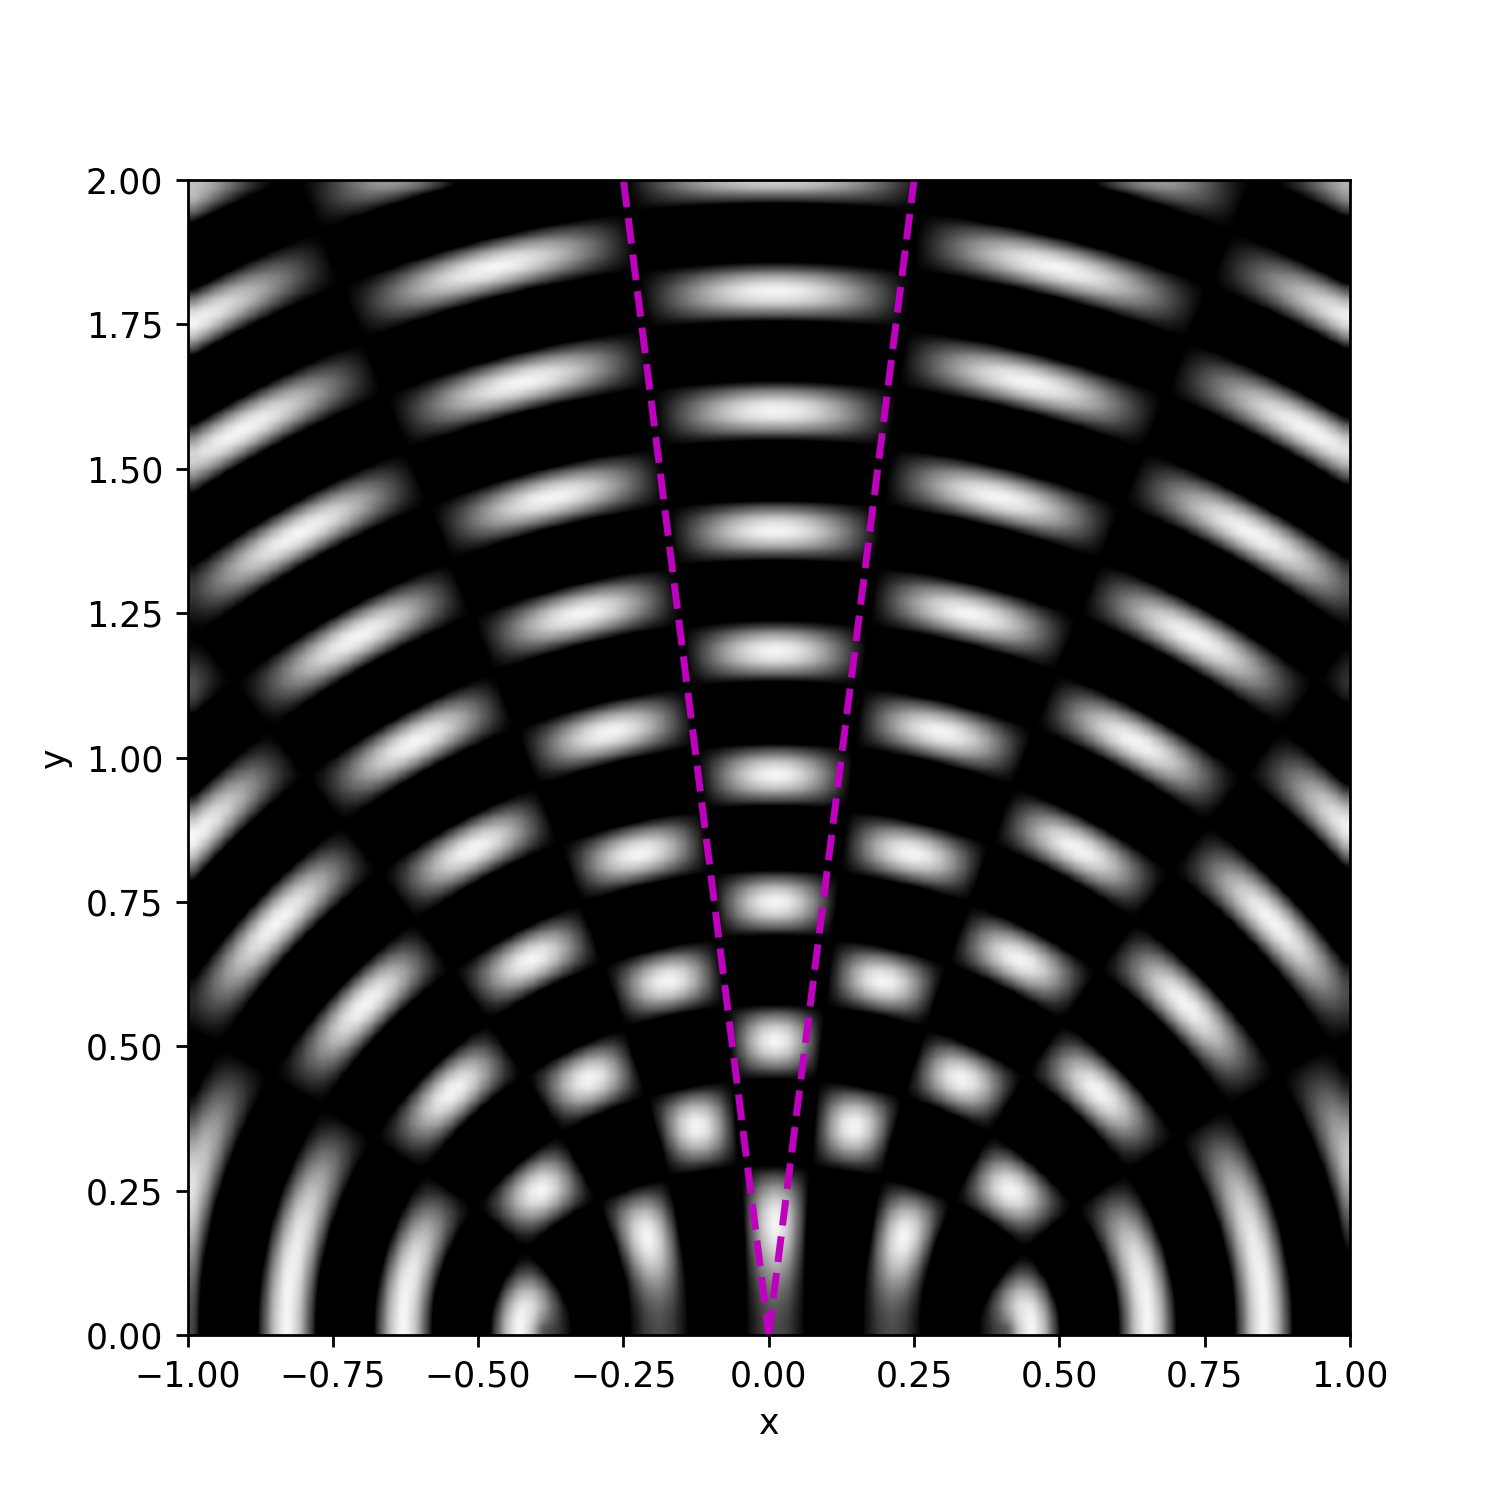

In [2]:
# Set slope
slope = 1

# Don't edit anything below this line!
xvals1 = np.linspace(0,1,100)
yvals1 = slope*xvals1

xvals2 = np.linspace(-1,0,100)
yvals2 = (-slope)*xvals2

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
im = plt.imshow(A[-1], interpolation='gaussian', aspect='auto',vmin=0,vmax=2,cmap='gray',extent = [-1,1,0,2])

plt.plot(xvals1,yvals1,lw=2,ls='--',color='m')
plt.plot(xvals2,yvals2,lw=2,ls='--',color='m')

ax.set_ylim(0,2)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [111]:
np.searchsorted(x_pos,left_x)

31